In [1]:

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

running_dir = r"/Users/4JStudent/Desktop/Code/Bens_Tetris_Regression"

In [2]:
## Dataloading
df = pd.read_csv (os.path.join(running_dir, "sprint_data.csv"))
df.columns = df.columns.str.lower()
df["normalized_pps"] = df["approxpps"].map (lambda x: 1 / (1 + np.exp(-x)))

df.head()

,timescorekaiyon,replay,played3,datestart,approxpps,dayssincestart,ln(days),ln(pps),normalized_pps
0,247.775,11409815,2020-02-10 4:13:34,2020-02-09,0.403592,1.176088,0.162194,-0.907351,0.599550
1,210.933,11410692,2020-02-11 4:13:34,2020-02-09,0.474084,2.176088,0.777529,-0.746370,0.616350
2,188.721,11410748,2020-02-12 4:13:34,2020-02-09,0.529883,3.176088,1.155650,-0.635100,0.629456
3,163.329,11446804,2020-02-11 4:16:08,2020-02-09,0.612261,2.177870,0.778348,-0.490596,0.648456
4,157.704,11447133,2020-02-11 4:26:21,2020-02-09,0.634099,2.184965,0.781600,-0.455550,0.653418


In [3]:
import torch
import torch.nn as nn
class RegressionModel (nn.Module):
  def __init__ (self, param_names: list):
    super ().__init__()
    self.initialize_weights(len(param_names))
    self.layer = nn.Linear (1, 1)

    # Paramaters
    exec (
      ", ".join(f"self.{name}" for name in param_names) + ' = ' + 
      ", ".join(
        [
          f'nn.Parameter(self.weights[{i}])' 
          for i in range (len(param_names))
          ]
      )
    )

  # Weights
  def initialize_weights (self, n):
    self.weights = [nn.init.uniform (torch.empty (1)) for i in range (n)]

  # Function
  def forward (self, x):
    return self.a * x + self.b
    # return self.layer (x)

    

/var/folders/vw/gp45gk5j0wgcpxl6qtgm181r000120/T/ipykernel_7700/1314916424.py:22: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  self.weights = [nn.init.uniform (torch.empty (1)) for i in range (n)]


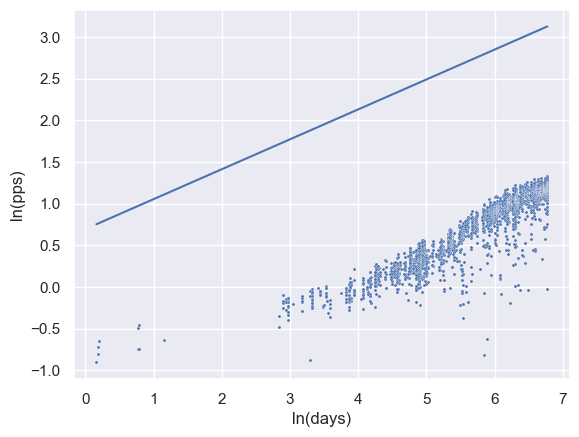

100%|██████████| 40/40 [00:00<00:00, 6151.81it/s]


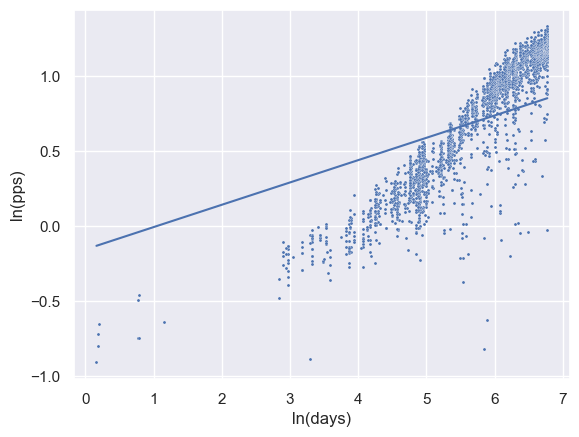

In [4]:

params = ["a", "b", "c"]
model = RegressionModel (params)

optimizer = torch.optim.Adam (model.parameters(), lr=0.2)
criterion = nn.L1Loss()

def plot_regression (df, model, min_scale=0, max_scale=10):
  sns.set_theme()
  sns.scatterplot (df, x="ln(days)", y="ln(pps)", s=5)

  xModel = torch.linspace(min_scale, max_scale, steps=500)
  yModel = model(xModel)
  # print (yModel)

  plt.plot(xModel.detach(), yModel.detach())
  plt.show()
  plt.close('all')

def train_regression (model, data, epochs=1, optimizer=None, criterion=None):
    for i in tqdm(range (epochs)):
      x, y = torch.unsqueeze(data[0], 1), torch.unsqueeze(data[1], 1)
      # for x, y in zip(x_data, y_data):      
        # print (f"{x.shape=} {y.shape=}")
        # print (f"{x=} {y=}")
      y_pred = model(x.type (torch.DoubleTensor))
      loss = criterion(y_pred, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


xData, yData = torch.tensor(df["ln(days)"]), torch.tensor(df["ln(pps)"])
plot_regression (df, model, min(xData), max(xData))
train_regression (model, (xData, yData), epochs=40, optimizer=optimizer, criterion=criterion)
plot_regression (df, model, min(xData), max(xData))
